In [10]:
#!/usr/bin/python
#imports and data loading

from seqdata import getset
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
import numpy
random.seed(42)

WINLEN=5
HALFLEN=WINLEN//2

X,y=getset(WINLEN)
X0_train,X0_test,y0_train,y0_test = train_test_split(X,y,random_state=1234567, shuffle=True)

def prep_data(AA):
    y_train=[1 if yy==AA else 0 for yy in y0_train]
    y_test=[1 if yy==AA else 0 for yy in y0_test]
    return X0_train,X0_test,y_train,y_test


In [11]:
#fit models
from sklearn.linear_model import LogisticRegression
models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    model=LogisticRegression(class_weight="balanced", penalty='l2',solver='lbfgs')
    model.fit(X_train, y_train)
    print(aa,model.score(X_train, y_train),model.score(X_test, y_test))
    scores.append(model.score(X_test, y_test))
    models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


0 0.6146139244277603 0.6177124032789397
1 0.5762404555785388 0.5773130059501008
2 0.5914434314802046 0.5839781404019511
3 0.6246669560850209 0.6245562961260502
4 0.5971381632149272 0.6006282080747721
5 0.6382185449066626 0.6373758267575781
6 0.5648339675000212 0.5678898848285197
7 0.6260799986380313 0.627135524400521
8 0.574154940967168 0.5737123011312852
9 0.5818585765724354 0.5887790801603718
10 0.5805902431965406 0.5822416302765647
11 0.5999557360164117 0.5946525702903547
12 0.6654408948134528 0.6618912638218545
13 0.5910007916443218 0.5878597512704614
14 0.5638976140010385 0.5615056564263643
15 0.5903623688041063 0.5852294491687735
16 0.5316189551997412 0.5236599504583876
17 0.6537449883807043 0.6545621696161802
18 0.5881151204065477 0.5901325365816288
19 0.5896473352230649 0.5909497178171046
0.5236599504583876 0.6618912638218545 0.5965882683418883 0.5894558083710003


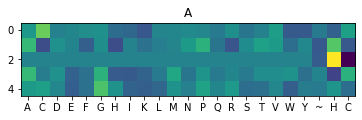

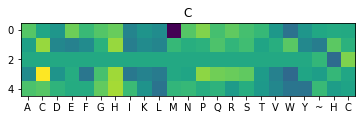

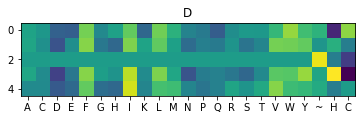

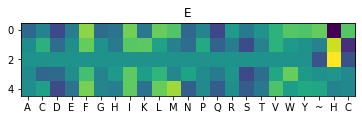

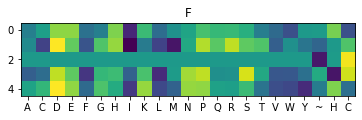

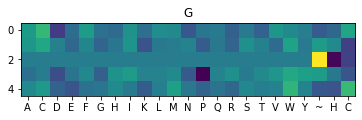

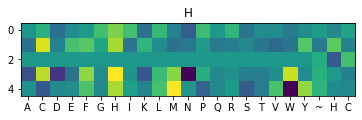

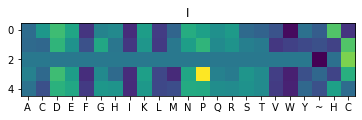

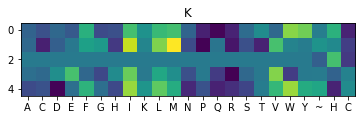

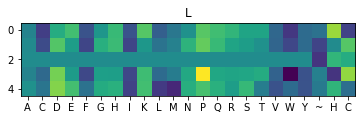

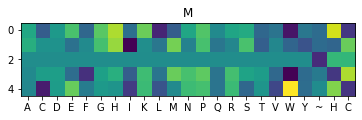

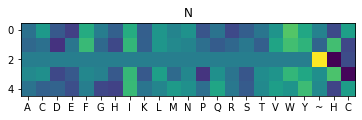

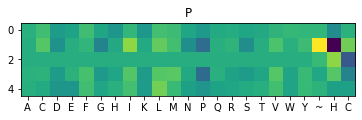

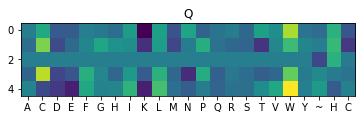

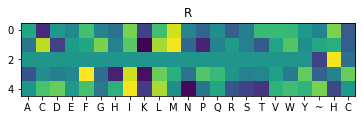

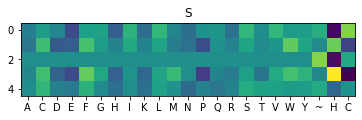

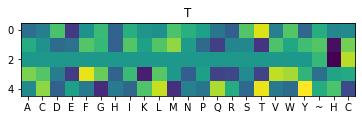

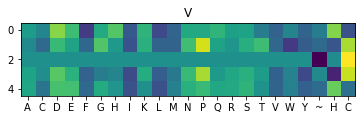

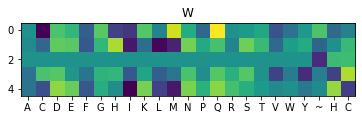

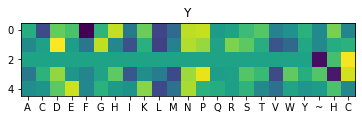

In [12]:
for ii,m in enumerate(models):
    params=m.coef_.reshape(WINLEN,23)
    plt.imshow(params)
    plt.xticks(range(23),'ACDEFGHIKLMNPQRSTVWY~HC')
    plt.title("ACDEFGHIKLMNPQRSTVWY"[ii])
    plt.show()

In [13]:
#do ss-aa statistics
C_prob=numpy.zeros(20)
H_prob=numpy.zeros(20)
E_prob=numpy.zeros(20)
wlen=len(X0_train[0])//23

for v,a in zip(X0_train,y0_train):
    if v[HALFLEN*23+20]==1: C_prob[a]+=1
    elif v[HALFLEN*23+21]==1: H_prob[a]+=1
    elif v[HALFLEN*23+22]==1: E_prob[a]+=1
C_prob/=sum(C_prob)*1.0
H_prob/=sum(H_prob)*1.0
E_prob/=sum(E_prob)*1.0
print(C_prob)
print(H_prob)
print(E_prob)

[0.07047867 0.01269036 0.0831061  0.04474137 0.03037295 0.13539875
 0.02332508 0.02936611 0.05283802 0.05317364 0.01279523 0.07173722
 0.08056802 0.03182028 0.0363091  0.08002265 0.06475228 0.0409028
 0.01388598 0.0317154 ]
[0.12142058 0.01045262 0.05843745 0.08191939 0.04151879 0.0375079
 0.01934951 0.05133939 0.06597307 0.10321357 0.02515922 0.03762944
 0.0276873  0.04851962 0.05362439 0.05146094 0.04404687 0.06038213
 0.01978706 0.04057076]
[0.06132915 0.0151753  0.03506018 0.04189778 0.0587476  0.05246817
 0.02298971 0.08972615 0.04639805 0.09160998 0.02138496 0.03178092
 0.01964068 0.03049014 0.04085121 0.05424734 0.07451596 0.1290075
 0.02442002 0.0582592 ]


In [14]:
aug_train=[]
aug_test=[]
for m in models:
    aug_train.append(m.predict_proba(X0_train)[:,1])
    aug_test.append(m.predict_proba(X0_test)[:,1])
aug_train=numpy.array(aug_train).T
aug_test=numpy.array(aug_test).T



(20, 20)


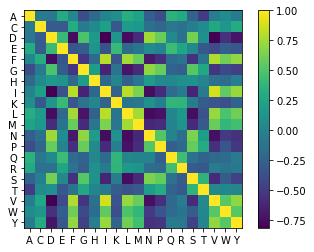

In [6]:
AAA="ACDEFGHIKLMNPQRSTVWY"
cv = numpy.corrcoef(aug_test.T)
print(cv.shape)
plt.imshow(cv)
plt.xticks(range(20),AAA)
plt.yticks(range(20),AAA)
plt.colorbar()
plt.show()

In [15]:
class permutator():
    def __init__(self):
        pass
    
    def _swap(self,seq):
        pos1,pos2=random.sample(range(0,len(seq)),2)
        seq[pos1],seq[pos2]=seq[pos2],seq[pos1]
        return seq
    
    def _reverse(self,seq):
        pos1,pos2=random.sample(range(0,len(seq)+1),2)
        if pos1>pos2: pos1,pos2=pos2,pos1
        nseq=[*seq[:pos1],*seq[pos1:pos2][::-1],*seq[pos2:]]
        return nseq
    
    def _shift(self,seq):
        pos1,pos2=random.sample(range(0,len(seq)),2)
        if pos1>pos2: pos1,pos2=pos2,pos1
        if random.choice((0,1)):    
            nseq=[*seq[:pos1],seq[pos2],*seq[pos1:pos2-1],*seq[pos2:]]    
        else:
            nseq=[*seq[:pos1],*seq[pos1+1:pos2],seq[pos1],*seq[pos2:]]    
        return nseq 
    
    def _shuffle(self,seq):
        pos1,pos2=random.sample(range(0,len(seq)+1),2)
        if pos1>pos2: pos1,pos2=pos2,pos1
        x=seq[pos1:pos2]
        random.shuffle(x)
        nseq=[*seq[:pos1],*x,*seq[pos2:]]
        return nseq
    
    def permutate(self,seq):
        s=seq[:]
        k=random.choice(range(20))
        if k==0:
            s=self._reverse(s)
        elif k==1:
            s=self._shift(s)
        elif k==2:
            s=self._shuffle(s)            
        else:    
            s=self._swap(s)
        return s
        
    

In [16]:
freq=[sum(y0_train==a) for a in range(20)]
freq=numpy.array(freq)/sum(freq)
import math
print(freq)

AAA="ACDEFGHIKLMNPQRSTVWY"
SSS="~HE"
def make_vec(a,s):
    v=[]
    for ii,(aa, ss) in enumerate(zip(a,s)):
        vv=numpy.zeros(23)
        if ii!=HALFLEN: vv[AAA.index(aa)]=1
        vv[SSS.index(ss)+20]=1
        v.append(vv)
    return numpy.array(v).flatten()


def seq_sc(sq,ss):
    sc=0

    #a=set(sq)
    #frq=[sq.count(aa)/len(sq) for aa in a]
    #S=-sum([f*math.log(f) for f in frq])
    for pos in range(HALFLEN, len(sq)-HALFLEN):
        q=sq[pos-HALFLEN:pos+HALFLEN+1]
        s=ss[pos-HALFLEN:pos+HALFLEN+1]        
        v=make_vec(q,s)
        sc+=math.log(models[AAA.index(sq[pos])].predict_proba([v])[0][1])
    return sc


#ss="~~~~HHHHHHHHH~~~~~~HHHHHHHH~~~~~EEEEEEE~~~~~EEEEEEE~~~~~~HHHHHHH~~~~~EEEEEEEE~~~~"
ss="~~~~EEEEEEEEEE~~~~~HHHHHHHHHHH~~~~~~EEEEEEEEE~~~~~EEEEEEEEEE~~~~"

aaprob=numpy.mean([{'~':C_prob,'H':H_prob,'E':E_prob}[s] for s in ss],axis=0)

#sq=[random.choice(AAA) for i in ss]
sq=[numpy.random.choice(list(AAA), p=aaprob) for k in ss]
#sq.sort()
for i in range(HALFLEN): sq[i]='G'
for i in range(1,HALFLEN+1): sq[-i]='G'    
sq[0]='M'

#sq=["G" for i in ss ]

#sq=[i for i in "MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLR"]
#ss="~EEEEEE~~~~EEEEE~~~~~EHHHHHHHHHHHH~~~HHHEEEEE~~EE~~~~~E~HHH~~~~~~EEEEEE~"

P=permutator()

cur=seq_sc(sq,ss)
for cyc in range(100000):
    #pos1,pos2=random.sample(range(3,len(sq)-3),2)
    #sq[pos1],sq[pos2]=sq[pos2],sq[pos1]
    nsq=P.permutate(sq[HALFLEN:-HALFLEN])
    nsq=[*sq[:HALFLEN],*nsq,*sq[-HALFLEN:]]
    new=seq_sc(nsq,ss)
    if new>cur:
        cur=new
        sq=nsq[:]
        print("".join(sq),cur) 
    
       


[0.08608494 0.01251309 0.0627442  0.05706649 0.04119955 0.08088392
 0.02185109 0.05178886 0.05586625 0.08007525 0.01922078 0.05004384
 0.0471837  0.03734348 0.04348085 0.06373162 0.05988406 0.06922206
 0.01852277 0.04129319]
MGAIATGVHDATTQTSGPFLRAKYTIVGRYVESLNLPQGPLIIFIHLESQYMASALGVRSPAGG -46.97157282747603
MGAIATGVQDATTQTSGPFLRAKYTIVGRYVESLNLPQGPLIIFIHLESHYMASALGVRSPAGG -46.539460143932125
MGAAITGVQDATTQTSGPFLRAKYTIVGRYVESLNLPQGPLIIFIHLESHYMASALGVRSPAGG -46.029433576784974
MGAAITGVQDATTQTSGPFPRAKYTIVGRYVESLNLPQGLLIIFIHLESHYMASALGVRSPAGG -44.40062701271732
MGAAITGVQDATTQTSGPFPRAKYTIVGRYVESLNLPQGLLIIFIHLESHAMYSALGVRSPAGG -44.349913073110955
MGAAITGVQDATTQTSGPFPRAKYTIVGRLVESLNLPQGLLIIFIHYESHAMYSALGVRSPAGG -44.29454871675455
MGAAITGVQDATTQTSGPFPRAKATIVGRLVESLNLPQGLLIIFIHYESHYMYSALGVRSPAGG -43.88070565394486
MGAAITGVQDATTQTSGPFPRAKAGIVGRLVESLNLPQGLLIIFIHYESHYMYSALTVRSPAGG -43.64625335494311
MGAAITGVQDATTQTSGPLPRAKAGIVGRLVESLNLPQGLFIIFIHYESHYMYSALTVRSPAGG -43.5254972334874
MGAAITGVQDATTQTSG

MGPAMRTIYHIVTAAPGIPAARLKELLQQLNQAAGGTVTLVERFIPGSSGYYHFIDTVLSSSGG -26.516894087239052
MGPAMRTIYHIVTAAPGLPAARLKELLQQLNQAAGGTVTIVERFIPGSSGYYHFIDTVLSSSGG -26.411778703867952
MGPAMRTIYHIVTAAPGLPAARLKELLQQLNQAAGGTVTVVERFIPGSSGYYHFIDTILSSSGG -26.38271336107472
MGPAMRTIYHIVTAAPQLPAARLKELLQQLNGAAGGTVTVVERFIPGSSGYYHFIDTILSSSGG -26.23627119709712
MGPAMRTIYHIVTAAPQLPAARLLKELQQLNGAAGGTVTVVERFIPGSSGYYHFIDTILSSSGG -26.183648916511387
MGPAMRTIYHIVTAAPQLPAARLLKELQQLNGAAGGTVTVIERFIPGSSGYYHFIDTVLSSSGG -26.133685432521855
MGPAMRTIYHIVTAAPQLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYYHFIDTVLSSSGG -25.981609993030773
MGPAMRTIYHIVTAAPQLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYHFIDYTVLSSSGG -25.94294916331702
MGPAMRTIYHIVTAAPQLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYHFYDITVLSSSGG -25.82831270684716
MGPMMRTIYHIVTAAPQLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYHFYDITVLSSSGG -25.566080909789807
MGPAMMRTIYHIVTAPQLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYHFYDITVLSSSGG -25.464771761128443
MGPAMMRTIYHIVTAQPLPAAQLLKELRQLNGAAGGTVTVIERFIPGSSGYHFYDITVLSSSGG -25.

KeyboardInterrupt: 

In [ ]:
MGGGYTVTGYSYWSNQPFDPAAAAELLKELCGHPFDKIINGQWTVTGRPDYIKDIVTVAVDGGG -22.518261386252814
MGGHWFVNTVWGQYWQDWDPVAAAADLIKELKENGEIIKTVCHHFDFSNDYIISRSVVSFDGGG -22.499918892008715
MGGGRIATHCQIIDNNNNNPELMKELMEELRPLDGNTYYNDIITSSSSSGQTIATGTYTIDGGG -23.729938049136955
~~~~EEEEEEEEEE~~~~~HHHHHHHHHHH~~~~~~EEEEEEEEE~~~~~EEEEEEEEEE~~~~
MGGGGKIIKEIKEWIPNYPAAAAAAQQLRQLLPNGKKIIEEWHRVDGSGRTVYHHTVTFGGGGG -18.33854222116195
MSGRFTVVTVVTFHWSDFDAAAMRLKEAAAQSSSCHMRIDYYWRFDQWDLRIKVVTVVEIDYNG -28.749171411312425

MGGGGITFSGTVTAAGGTGAAAAMLKALKEWGKDYPVLTELFTDYWNDGCCQIISSLVSGGGGG -20.330757049785344



In [ ]:
#  #for pos in range(3,len(sq)-3): 
#    pos=random.choice(range(3,len(sq)-3))
#    t=[]
#    cur=sq[pos]
#    for a in AAA:
#        sq[pos]=a
#        t.append(seq_sc(sq,ss))
#        if a==cur: tresh=t[-1]
#    better=[a for a,v in zip(AAA,t) if v>=tresh]
#    sq[pos]=random.choice(better)
    #sq[pos]=AAA[numpy.argmax(t)]
#    print("".join(sq),seq_sc(sq,ss))
##    q=sq[pos-3:pos+4]
##    s=ss[pos-3:pos+4]
##    v=make_vec(q,s)
##    proba=[m.predict_proba([v,])[0][1] for m in models]
##    proba=numpy.array(proba)/sum(proba)
##    #print(proba)
##    sel=numpy.random.choice(list(AAA), p=proba) 
##    #sel=AAA[proba.index(max(proba))]
##    sq[pos]=sel
##    print ("".join(sq))

In [ ]:
model=LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(aug_train,y0_train)
print(model.score(aug_train, y0_train))
print(model.score(aug_test, y0_test))
print(model.coef_)
model=LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X0_train,y0_train)
print(model.score(X0_train, y0_train))
print(model.score(X0_test, y0_test))
print(model.coef_)

In [ ]:

X_train_2=numpy.concatenate([X_train,aug_train],axis=1)
X_test_2=numpy.concatenate([X_test,aug_test],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
#models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    #######
    aug_train=[]
    aug_test=[]
    for m in models:
        aug_train.append(m.predict_proba(X_train)[:,0])
        aug_test.append(m.predict_proba(X_test)[:,0])
    aug_train=numpy.array(aug_train).T
    aug_test=numpy.array(aug_test).T
    X_train_2=aug_train  #numpy.concatenate([X_train,aug_train],axis=1)
    X_test_2=aug_test    #numpy.concatenate([X_test,aug_test],axis=1)
    #######
    model=LogisticRegression(class_weight="balanced", max_iter=1000)
    model.fit(X_train_2, y_train,)
    print(aa,model.score(X_train_2, y_train),model.score(X_test_2, y_test))
    scores.append(model.score(X_test_2, y_test))
    #models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score
models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    model=RandomForestClassifier(n_estimators=100,class_weight="balanced")
    model.fit(X_train, y_train)
    w0=y_train.count(0)
    w1=y_train.count(1)
    ww=[1.0/w1 if yy==1 else 1.0/w0 for yy in y_test]
    ny=model.predict(X_test)
    sc=accuracy_score(y_test,ny,sample_weight=ww)
    print(aa,model.score(X_train, y_train),model.score(X_test, y_test),sc)
    
    scores.append(model.score(X_test, y_test))
    models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
#print (model.coef_)

In [ ]:
from sklearn.svm import LinearSVC, SVC
model=LinearSVC()
#model=SVC(kernel='rbf')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=10,)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))